
#**CIFAR-100 Image classsification and prediction ( using tensorflow)**




---



## **Introduction**

The CIFAR-100 dataset consists of 50,000 color training images and 10,000 testing images of size 32x32.The images are grouped under 100 labels (over 20 classes). The dataset can be used for deep learning and computer vision.


Convolutional neural network (CNN) is a deep neural network used to analyze image data.A CNN can be build using teserflow to understand,classify and predict images of CIFAR-100 dataset.

In [ ]:
# importing required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Flatten, Dense, Dropout, Activation,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

In [ ]:
# loading dataset
(x_train, y_train), (x_test,y_test) = datasets.cifar100.load_data()
# loading the class labels
labels =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [ ]:
print(f'x_train ={x_train.shape} \n y_train={y_train.shape}')

x_train =(50000, 32, 32, 3) 
 y_train=(50000, 1)


In [ ]:
print(f'x_text ={x_test.shape} \n y_test={y_test.shape}')

x_text =(10000, 32, 32, 3) 
 y_test=(10000, 1)


In [ ]:
x_train[0,:,:].shape

(32, 32, 3)

There are 50k training images and 10k test images of size, 32 pixels x 32 pixels, each image in 3 channels. The 3 channels represents the RGB values of each pixels

##**Data visualization:**
<p>To verify the dataset

[98]
woman


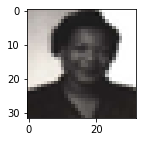

In [ ]:
#@title Sample Image
# sample image
index =np.random.randint(0,1000)
plt.figure(figsize=(2,2))
plt.imshow(x_train[index])
print(y_train[index])
print(labels[int(y_train[index])])

##**Data preprocessing**

A 4D array input is required by the CNN to perform image recognition and classification

**Normalizing**:
* Scaling the images to be within same range as the weights of the neural networks are initialized to very small numbers.
* Normalization helps to converge models faster
* pixel valies are scaled to range [0,1]
* since the max value of CIFAR-100 image date is 255, we can normalize the data by dividing every number by 255


In [ ]:
#4D array input for building the CNN model using Keras
input_shape = (32, 32, 3)
# to normalize data we divide every number to the max value which is 255.0, which also changes its type to float

x_train =x_train/ 255.0
x_test =x_test/ 255.0

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

**Data augmentation:**
<p>Another common pre-processing technique involves augmenting the existing data-set with perturbed versions of the existing images. Scaling, rotations and other affine transformations are typical. This is done to expose the neural network to a wide variety of variations. This makes it less likely that the neural network recognizes unwanted characteristics in the data-set.



*   decreases the chance that the neural network recognizes unwanted charecteristics from data




In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
])


## Building the model

* CNN is configured to process input of shape (32,32,3) which is the format of CIFAR database, passing inpit chape to the first layer
* Build a sequential model and convolution and max pooling layers are added to it. The hidden layers in a CNN are generally convolution and pooling(downsampling) layers.
* In each convolution layer, we take a filter of a small size and move that filter across the image and perform convolution operations, which are the  element-wise matrix multiplication between the filter values and the pixels in the image and the resultant values are summed.
*Batch normalization standardizes the inputs to a layer for each mini-batch; stabilizing and significantly reducing the number of training epochs needed to train a deep neural network
* Dropout layers are added in between so that data is forced to find new path as the dropout randomly switches off some neurons in the network.This reduces overfitting
* To complete the model, the last output of the convolutional base is fed into the dense layers to perform classfication.The output of conv layers needs to be flatten or unrol first since Dense layers take vectors as input while conv output is a tensor.
* CIFAR - 100 has 100 output classes, final Dense layer with 100 outputs is used (decision making).

In [ ]:

# initialize the model
model = Sequential()
# data augmentation commented as resourse limits in colab
# model.add(data_augmentation)

# Padding is added to preserve width and height.
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape,padding='same'))
# Layer that normalizes its inputs
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(.25))

model.add(Conv2D(128, (3, 3), padding='same',activation = 'relu'))
model.add(Conv2D(128, (3, 3), padding='same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.00001),activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(0.00001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(256, (3, 3), padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(0.00001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(0.00001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(512, (3, 3), padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(0.00001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(0.00001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.00001),activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.00001),activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(512, (3, 3),activation = 'relu', padding='same',kernel_regularizer=regularizers.l2(0.00001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
# end of hidden layers

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(0.00001),activation = 'relu'))
model.add(Dropout(0.5))
# decision making layer
model.add(Dense(100,activation='softmax'))

## Training and Evaluation

<p>The model learns the dataset or is gradually optimized in this step of ML.The structure of the dataset is learned so that the model can make predicions on unseen data


  * an epoch is one pass throught the dataset
  * During each epoch,features(x) and labels(y) from dataset is taken.
  * model variables are updated using an optimizer

In [ ]:
# To train a model with fit(), a loss function, an optimizer, and optionally, some metrics to monitor are needed to be specified
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# fit data to the model
model.fit(x=x_train, y=y_train, epochs=200,verbose=1,batch_size=256,
           steps_per_epoch=x_train.shape[0] // 256,
           validation_data=(x_test,y_test))

Epoch 1/200
195/195 [==============================] - 14s 60ms/step - loss: 5.0435 - accuracy: 0.0115 - val_loss: 4.6529 - val_accuracy: 0.0108
Epoch 2/200
195/195 [==============================] - 11s 57ms/step - loss: 4.5478 - accuracy: 0.0197 - val_loss: 4.5786 - val_accuracy: 0.0176
Epoch 3/200
195/195 [==============================] - 11s 57ms/step - loss: 4.3135 - accuracy: 0.0361 - val_loss: 4.4332 - val_accuracy: 0.0266
Epoch 4/200
195/195 [==============================] - 11s 57ms/step - loss: 4.1980 - accuracy: 0.0458 - val_loss: 4.2596 - val_accuracy: 0.0520
Epoch 5/200
195/195 [==============================] - 11s 57ms/step - loss: 4.0576 - accuracy: 0.0627 - val_loss: 4.1316 - val_accuracy: 0.0787
Epoch 6/200
195/195 [==============================] - 11s 57ms/step - loss: 3.8998 - accuracy: 0.0838 - val_loss: 4.3583 - val_accuracy: 0.0965
Epoch 7/200
195/195 [==============================] - 11s 57ms/step - loss: 3.7372 - accuracy: 0.1143 - val_loss: 3.9272 - val_ac

In evaluation, how effectively does the model makes predictions is determined.Test dataset is used for this.The model only evaluates a single epoch unlike training.

In [ ]:
# model evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 3.0150 - accuracy: 0.6290


Accuracy of the model can be increased by changing hyperparamers and adding data augmentation.
<!--  -->

In [ ]:
# summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_33 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 128)      

## **Prediction**

'trout'

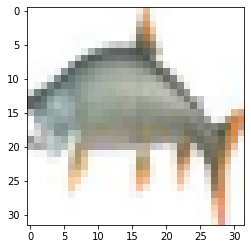

In [ ]:
# random image for prediction
test_index = np.random.randint(0,10000)
plt.imshow(x_test[test_index])
labels[int(y_test[test_index])]

In [ ]:
# prediction
pred = model.predict(x_test)
# print(pred[test_index])
print('\npredicted label:',labels[np.argmax(pred[test_index])])



predicted label: trout
